In [169]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import random as rand
from sklearn import linear_model as lm
from mpl_toolkits.mplot3d import Axes3D

In [170]:
# Part 1
advertising = pd.read_csv('Advertising.csv')
advertising

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [171]:
df = pd.DataFrame(advertising)

df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [172]:
# Part 2

mean = df.TV.mean()

std = df.TV.std()

minimum = df.TV.min()

maximum = df.TV.max()

df['TVstd'] = (df['TV'] - mean) / std

df['TVnorm'] = (df['TV'] - minimum) / (maximum - minimum)

print(df)

     Unnamed: 0     TV  radio  newspaper  sales     TVstd    TVnorm
0             1  230.1   37.8       69.2   22.1  0.967425  0.775786
1             2   44.5   39.3       45.1   10.4 -1.194379  0.148123
2             3   17.2   45.9       69.3    9.3 -1.512360  0.055800
3             4  151.5   41.3       58.5   18.5  0.051919  0.509976
4             5  180.8   10.8       58.4   12.9  0.393196  0.609063
..          ...    ...    ...        ...    ...       ...       ...
195         196   38.2    3.7       13.8    7.6 -1.267759  0.126818
196         197   94.2    4.9        8.1    9.7 -0.615491  0.316199
197         198  177.0    9.3        6.4   12.8  0.348934  0.596212
198         199  283.6   42.0       66.2   25.5  1.590574  0.956713
199         200  232.1    8.6        8.7   13.4  0.990720  0.782550

[200 rows x 7 columns]


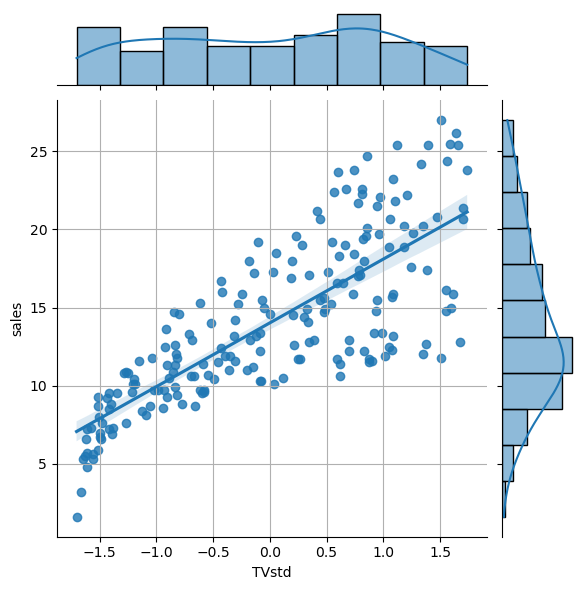

In [173]:
# Part 3

sns.jointplot(advertising, x = 'TVstd', y = 'sales', kind = 'reg')
plt.grid()

In [174]:
# Part 4

def MSEfunc(r, p):
    return np.mean((r - p) ** 2)


def MAEfunc(r, p):
    return np.mean(np.abs(r - p))

In [175]:
# Part 5


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def ypred(b0, b1, x):
  return b0 + b1 * x

b0 = np.arange(-200, 200, 5)
b1 = np.arange(-200, 200, 5)


MSE_std = []
MSE_norm = []

MAE_std = []
MAE_norm = []



for i in range(len(b0)):
  for j in range(len(b1)):
    MSE_std.append(MSEfunc(df.sales, ypred(b0[i], b1[j], df.TVstd)))
    MSE_norm.append(MSEfunc(df.sales, ypred(b0[i], b1[j], df.TVnorm)))

    MAE_std.append(MAEfunc(df.sales, ypred(b0[i], b1[j], df.TVstd)))
    MAE_norm.append(MAEfunc(df.sales, ypred(b0[i], b1[j], df.TVnorm)))


    
def surface_plot(cost, z):
  B0, B1 = np.meshgrid(b0, b1)

  fig = plt.figure(figsize = (8,8))
  ax = plt.axes(projection='3d')
  surf = ax.plot_surface(B0, B1, cost, cmap = plt.cm.viridis)

  fig.colorbar(surf, shrink=.5, aspect=8)
  plt.show()
 

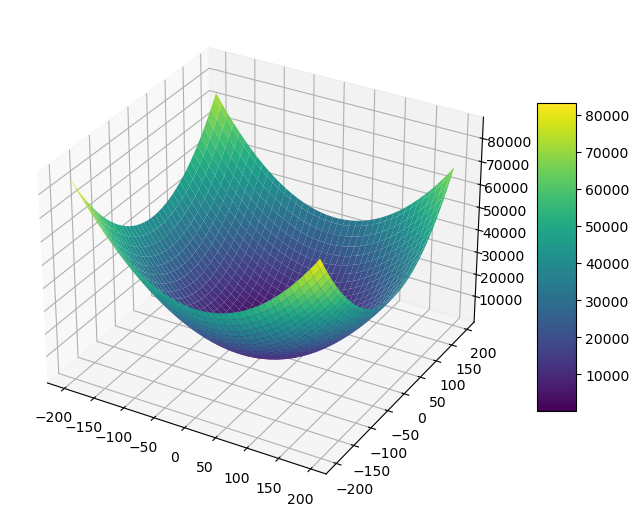

In [176]:
surface_plot(np.reshape(MSE_std,(80, 80)), 'mse_std')


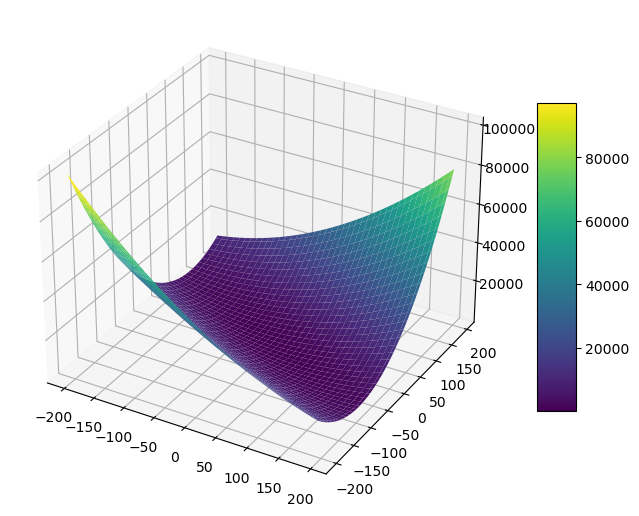

In [177]:
surface_plot(np.reshape(MSE_norm,(80, 80)), 'mse_norm')


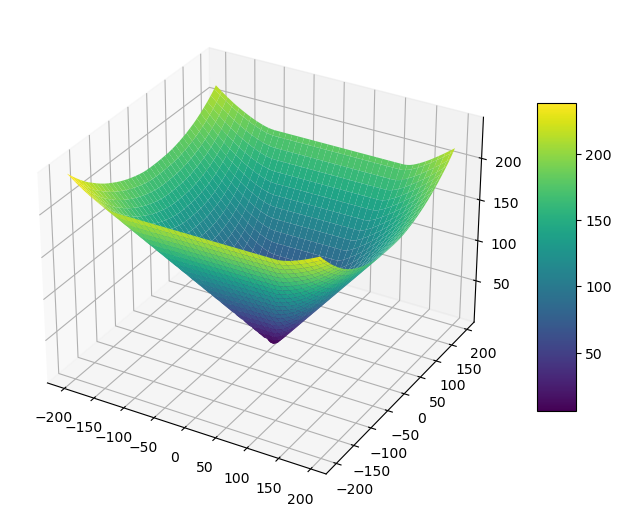

In [178]:
surface_plot(np.reshape(MAE_std, (80, 80)), 'mae_std')


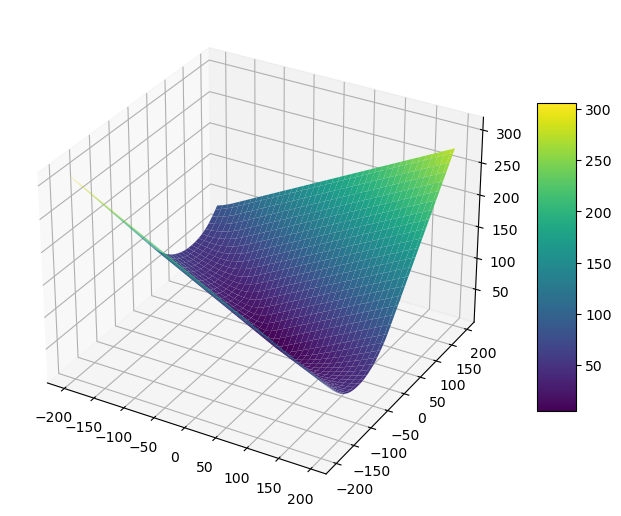

In [179]:
surface_plot(np.reshape(MAE_norm, (80, 80)), 'mae_norm')


In [180]:
# Part 6

random = {'vals' : ([], [])}
gradient = {'vals' : ([], [])}

def randomStep(X, Y):
    b0 = rand.randint(-200, 200)
    b1 = rand.randint(-200, 200)
    
    random['vals'][0].append(b0)
    random['vals'][1].append(b1)
    
    curr = MSEfunc(Y, (b0 + b1 * X))
    val = 0
    while (val < 1000):
        
        b0new = b0 + rand.uniform(-1, 1)
        b1new = b1 + rand.uniform(-1, 1)
        random['vals'][0].append(b0)
        random['vals'][1].append(b1)
        
        if (MSEfunc(Y, (b0new + b1new * X)) >= curr):
            val += 1
        else:
            val = 0
            b0 = b0new
            b1 = b1new
            curr = MSEfunc(Y, (b0 + b1 * X))
    
    return b0, b1

print(randomStep(df.TVstd, df.sales))


(14.024249271330984, 4.1131039170500765)


In [181]:
# Part 7

def gradientDescent(X, Y):
    learningRate=0.01 
    val = 0
    # Initialize coefficients
    b0 = rand.randrange(-200, 200)
    b1 = rand.randrange(-200, 200)
    

    gradient['vals'][0].append(b0)
    gradient['vals'][1].append(b1)
    
    while val < 1000:
        error = (b0 + b1 * X) - Y
        
        gradb0 = error.mean()
        gradb1 = (error * X).mean()
        
        b0 = b0 - learningRate * gradb0
        b1 = b1 - learningRate * gradb1
        val+=1
        gradient['vals'][0].append(b0)
        gradient['vals'][1].append(b1)
    
    # Return the best-fit parameters
    return b0, b1

print(gradientDescent(df.TVstd, df.sales))

(14.029708626964512, 4.089800300975209)


In [182]:
# Part 8

regr = lm.LinearRegression()
regr.fit(df[['TVstd']], df.sales)

print(regr.intercept_, regr.coef_)

14.0225 [4.08122196]


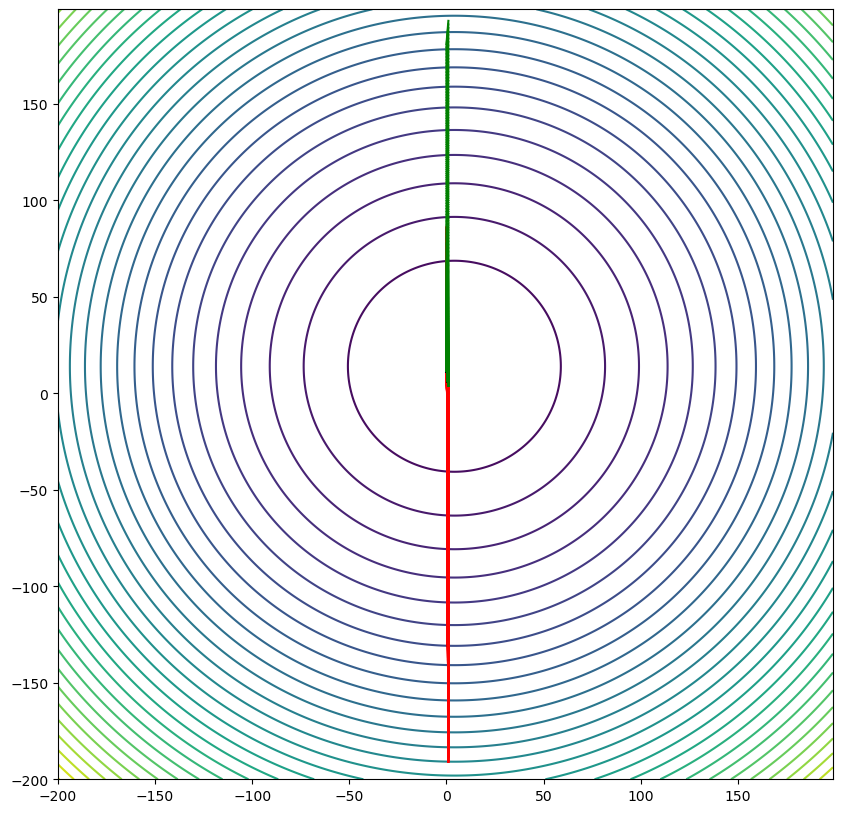

In [183]:
# Part 9
b0 = np.arange(-200, 200, 1)
b1 = np.arange(-200, 200, 1)
B0, B1 = np.meshgrid(b0, b1)


def MSEarr(X, Y, column, n):
  Z = np.zeros(shape = (n, n))

  for i in range(n):
    for j in range(n):
      predictions = Y[i][0] + X[i][j] * column

      Z[i][j] = MSEfunc(df.sales, predictions)
  return Z

Z = MSEarr(B0, B1, df.TVstd, 400)

plt.figure(figsize = (10,10))


cp = plt.contour(b0, b1, Z, 30)

randomStep = random["vals"]
plt.plot(randomStep, "red")


gradientStep = gradient["vals"]
plt.plot(gradientStep, color = "green")

plt.show()
